In [1]:
import torch
import torch.nn as nn
from torch.optim import SGD
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x = torch.tensor([[6,2], [5,2],[1,3],[7,6]]).float() #four data points
y = torch.tensor([1,5,2,5]).float()

In [6]:
x

tensor([[6., 2.],
        [5., 2.],
        [1., 3.],
        [7., 6.]])

In [8]:
y

tensor([1., 5., 2., 5.])

In [9]:
M1 = nn.Linear(2, 8, bias = False)
M1

Linear(in_features=2, out_features=8, bias=False)

In [10]:
M1(x)

tensor([[ 0.6401,  1.7465,  2.0066, -0.9964,  2.0782, -2.4070,  0.6045, -3.4572],
        [ 0.4029,  1.5397,  1.8293, -0.9016,  1.8206, -2.1663,  0.4074, -2.9284],
        [-0.9381,  0.9660,  1.5916, -0.7363,  1.0561, -1.6846, -0.6699, -0.9555],
        [-0.6897,  2.9656,  4.0697, -1.9465,  3.4005, -4.5729, -0.3544, -4.5550]],
       grad_fn=<MmBackward0>)

In [12]:
M2 = nn.Linear(8, 1, bias=False)
M2

Linear(in_features=8, out_features=1, bias=False)

In [14]:
M2(M1(x))

tensor([[0.6635],
        [0.6285],
        [0.7155],
        [1.6058]], grad_fn=<MmBackward0>)

In [16]:
y

tensor([1., 5., 2., 5.])

## Constructing Neural Network throuh OOP

In [17]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2, 8, bias = False)
        self.Matrix2 = nn.Linear(8, 1, bias = False)
    def forward(self, x):
        x = self.Matrix1(x)
        x = self.Matrix2(x)
        return x.squeeze()

In [18]:
f = MyNeuralNet()
for par in f.parameters():
    print(par)

Parameter containing:
tensor([[ 0.5434, -0.5678],
        [ 0.4119,  0.3558],
        [-0.1914, -0.1578],
        [ 0.2718, -0.5765],
        [-0.0467,  0.7062],
        [ 0.0717,  0.5437],
        [-0.6847, -0.0615],
        [ 0.6222,  0.5085]], requires_grad=True)
Parameter containing:
tensor([[ 0.3434,  0.3020,  0.2313, -0.2710, -0.2339, -0.1426, -0.2423, -0.1115]],
       requires_grad=True)


In [19]:
yhat = f(x)
yhat

tensor([ 1.2373,  0.9470, -0.4667,  0.5183], grad_fn=<SqueezeBackward0>)

In [30]:
y

tensor([1., 5., 2., 5.])

## Adjusting a so that yhat and y are similar

In [21]:
L = nn.MSELoss() #mean squared error
L(y, yhat)

tensor(10.6634, grad_fn=<MseLossBackward0>)

In [23]:
torch.mean((y-yhat)**2)

tensor(10.6634, grad_fn=<MeanBackward0>)

## Stochastic gradient descent takes in all model parameters a along with the learning rate l 


In [24]:
 opt = SGD(f.parameters(), lr = 0.001)

In [25]:
losses = []
for _ in range(50):
    opt.zero_grad() #flushes previous epoch's gradient
    loss_value = L(f(x),y) #compute loss
    loss_value.backward() #compute gradient
    opt.step() #perform iteration using gradient above
    losses.append(loss_value.item())

## Plot L(a) as a function of number of iterations

Text(0.5, 0, 'Epochs')

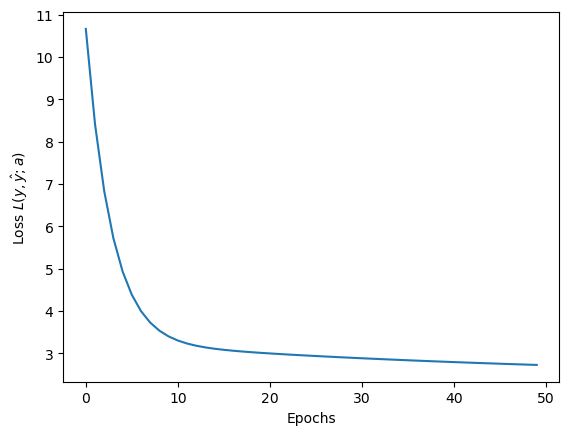

In [27]:
plt.plot(losses)
plt.ylabel('Loss $L(y, \hat{y};a)$')
plt.xlabel('Epochs')

In [28]:
f(x)

tensor([3.4259, 2.9309, 1.1787, 4.8325], grad_fn=<SqueezeBackward0>)

In [29]:
y

tensor([1., 5., 2., 5.])